In [1]:
%matplotlib inline
from collections import Counter

members = pd.read_csv("data/members_v3.csv")
train = pd.read_csv("data/train_v2.csv")
transactions = pd.read_csv("data/transactions_v2.csv")
user_logs = pd.read_csv("data/user_logs_v2.csv")
sample_submission = pd.read_csv("data/sample_submission_v2.csv")

In [2]:
transactions.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06,1.431009e+06
mean,3.791835e+01,6.601770e+01,2.817870e+02,2.813172e+02,7.853025e-01,2.016848e+07,2.017110e+07,2.455121e-02
std,4.964805e+00,1.024864e+02,4.351861e+02,4.354200e+02,4.106124e-01,4.858797e+03,3.032367e+03,1.547529e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.016042e+07,0.000000e+00
25%,3.600000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.017023e+07,2.017041e+07,0.000000e+00
50%,4.000000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017031e+07,2.017042e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.017032e+07,2.017050e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [3]:
transactions.tail()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1431004,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,20170215,20170817,0
1431005,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,20170306,20170406,0
1431006,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,20170308,20170408,0
1431007,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,20170318,20170417,0
1431008,zzZmdSzz7J9oyC/5nHr/HBvWg6k+p2W15b6lt/VKUQE=,32,180,699,699,0,20161212,20170613,0


In [4]:
transactions_new = transactions.sort_values(by=['transaction_date'], ascending=False).reset_index(drop=True) # transaction_date이 제일 최신날짜인 것을 기준으로 중복제거
transactions_new = transactions_new.drop_duplicates(subset=['msno'], keep='first')

In [5]:
transactions_new.shape

(1197050, 9)

In [6]:
train_transactions = pd.merge(train, transactions_new, how='left') # train 데이터와 msno를 기준으로 merge
train_transactions.shape

(970960, 10)

In [7]:
train_transactions.isnull().sum() #train에는 있고, transactions에는 없는 값들이 NaN으로 들어간다. 37382개

msno                          0
is_churn                      0
payment_method_id         37382
payment_plan_days         37382
plan_list_price           37382
actual_amount_paid        37382
is_auto_renew             37382
transaction_date          37382
membership_expire_date    37382
is_cancel                 37382
dtype: int64

In [8]:
# fill train_transactions['payment_method_id'] NaN values
pmi = train_transactions['payment_method_id'].dropna(axis=0, how=any)
pmi_count = Counter(pmi).most_common()
print("pmi_count" +str(pmi_count))

pmi_count[(41.0, 540802), (40.0, 73261), (36.0, 67937), (39.0, 65214), (38.0, 41999), (37.0, 36864), (34.0, 28703), (30.0, 16388), (29.0, 15403), (33.0, 14127), (31.0, 10301), (32.0, 7756), (15.0, 2213), (23.0, 2129), (27.0, 1822), (28.0, 1652), (19.0, 1296), (21.0, 910), (20.0, 833), (16.0, 813), (18.0, 635), (14.0, 544), (17.0, 506), (22.0, 483), (13.0, 305), (35.0, 249), (12.0, 209), (26.0, 89), (11.0, 75), (10.0, 38), (8.0, 9), (3.0, 8), (6.0, 5)]


In [10]:
pmi_count = dict(pmi_count)
sum_count = 0
for i in pmi_count.values():
    sum_count = i + sum_count
    
sum_count

933578

In [11]:
result = []
for a in pmi_count.values():
    result.append(a/sum_count)

In [12]:
pmi.sort_values(ascending=False).unique()
pmi_ls = list(pmi_count.keys())
pmi_nan = np.random.choice(pmi_ls, 37382, p = result)

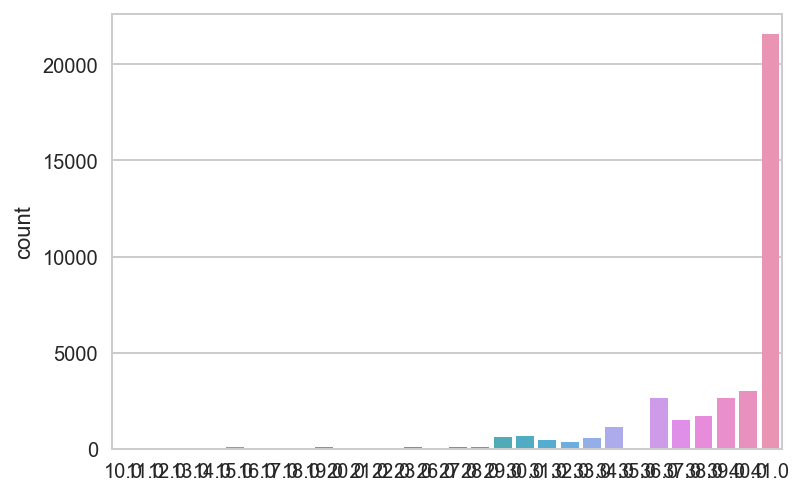

In [13]:
sns.countplot(pmi_nan)
plt.show()

In [14]:
# fill train_transactions['payment_plan_days'] NaN values
ppd = train_transactions['payment_plan_days'].dropna(axis=0, how=any)
ppd_count = Counter(ppd).most_common()
print("ppd_count" +str(ppd_count))

ppd_count[(30.0, 915274), (410.0, 4455), (90.0, 3689), (180.0, 2929), (195.0, 2925), (360.0, 1221), (100.0, 636), (60.0, 493), (7.0, 409), (395.0, 291), (200.0, 272), (240.0, 189), (120.0, 186), (365.0, 154), (400.0, 150), (1.0, 89), (450.0, 74), (10.0, 59), (14.0, 24), (70.0, 14), (415.0, 12), (80.0, 9), (270.0, 8), (110.0, 7), (35.0, 4), (230.0, 2), (3.0, 2), (0.0, 1)]


In [15]:
ppd_count = dict(ppd_count)

result2 = []
for a in ppd_count.values():
    result2.append(a/sum_count)
    
ppd_ls = list(ppd_count.keys())
ppd_nan = np.random.choice(ppd_ls, 37382, p = result2)

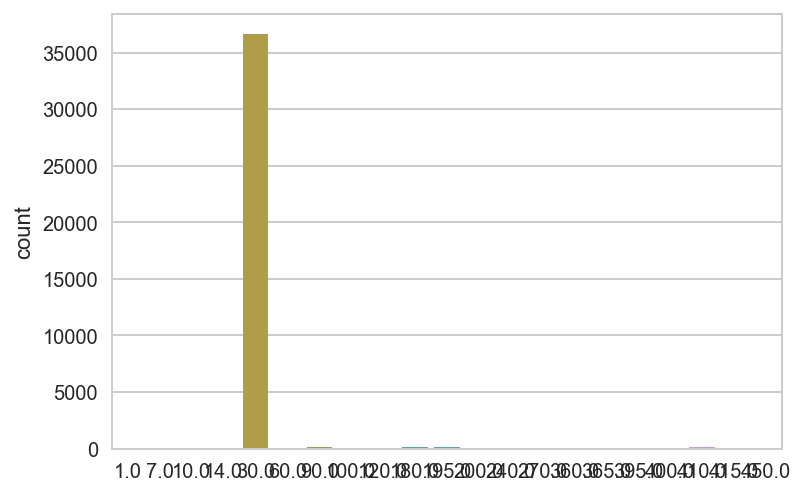

In [16]:
sns.countplot(ppd_nan)
plt.show()